In [1]:
import numpy as np
import healpy as hp
import fitsio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
hp.UNSEEN < -1000000

True

In [3]:
np.arange(5) + 1

array([1, 2, 3, 4, 5])

In [4]:
# num = input('Enter number: ')

# while not num.isdigit():
#     num = input('Please enter valid integer: ').strip()

# num = int(num)
# print(2*num)

In [5]:
# '78'.isdigit()

In [6]:
# res = input('Enter NSIDE resolution: ')

# while (not res.isdigit()) or (2**int(np.log2(int(res))) != int(res)):
#     res = input('Please enter valid resolution: ')
    
# res = int(res)
# print('Resolution: ' + str(res))

In [7]:
# userInput = input('Do you want to interactively determine the degrees of fits? Y/N: ')

# while (userInput != 'y') and (userInput != 'Y') and (userInput != 'n') and (userInput != 'N'):
#     userInput = input('Please enter \'Y\' for yes or \'N\' for no: ')
    
# if (userInput == 'y') or (userInput == 'Y'):
#     userInput = True
# else:
#     userInput = False
    
# print(userInput)

In [8]:
# if not userInput:
#     degree = input('Enter degree of all fits: ')

#     while not degree.isdigit():
#         degree = input('Please enter valid integer: ')

#     degree = int(degree)

In [9]:
# percent = input('Enter fraction of variance to capture (between 0 and 1): ')

# validValue = True

# try:
#     float(percent)
#     if (float(percent) > 1) or (float(percent) < 0):
#         validValue = False
# except ValueError:
#     validValue = False
    
# while not validValue:
#     percent = input('Please enter valid number: ')
    
#     validValue = True
    
#     try:
#         float(percent)
#         if (float(percent) > 1) or (float(percent) < 0):
#             validValue = False
#     except ValueError:
#         validValue = False
    
# percent = float(percent)
# print(percent)

In [10]:
def func(x, a, b):
    return a * np.log(b * x)

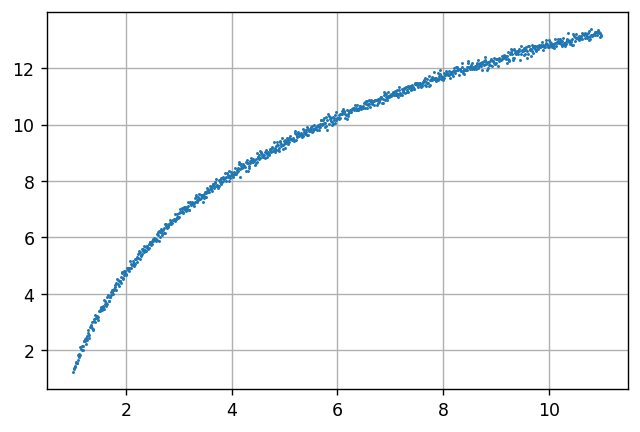

In [11]:
xdata = np.linspace(1, 11, 1000)
y = func(xdata, 5, 1.3)
rng = np.random.default_rng()
y_noise = 0.1 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.figure(dpi = 125)
plt.scatter(xdata, ydata, label='data', zorder = 3, s = 0.5)
plt.grid(zorder = 0)
plt.show()

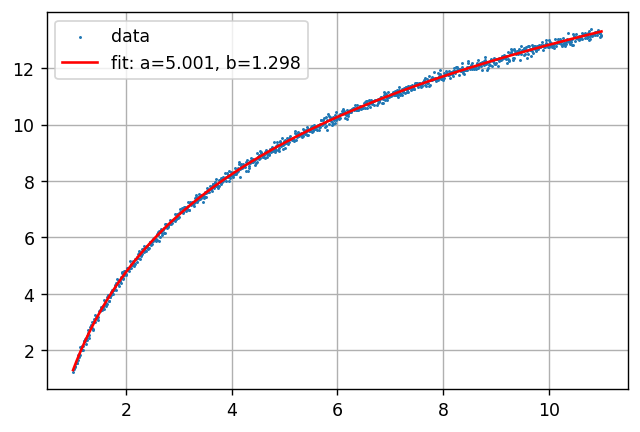

In [12]:
popt, pcov = curve_fit(func, xdata, ydata)
plt.figure(dpi = 125)
plt.scatter(xdata, ydata, label='data', zorder = 3, s = 0.5)
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f' % tuple(popt), zorder = 3)
plt.grid(zorder = 0)
plt.legend()
plt.show()

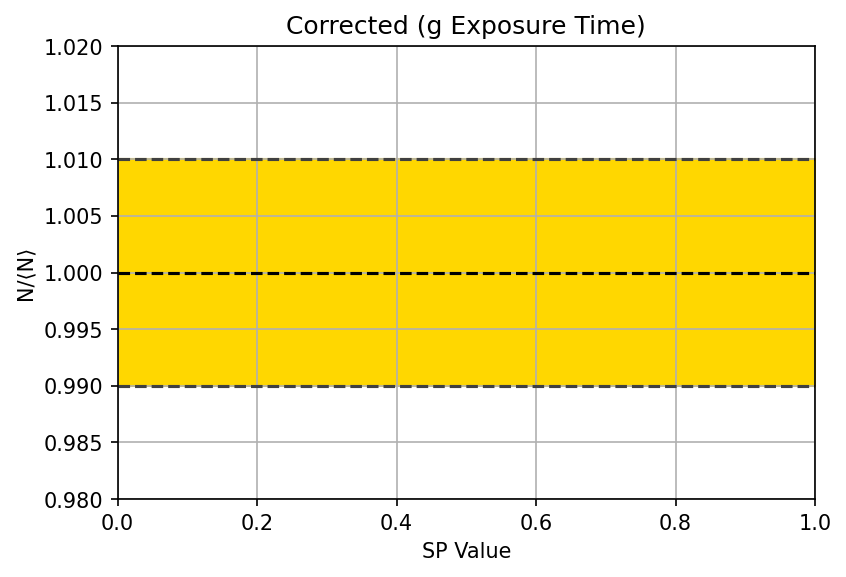

In [13]:
plt.figure(dpi = 150)
# plt.plot(xValues, yValues, marker = '.', ms = 10, zorder = 3, color = 'r')
plt.axhline(y = 1, color = 'k', linestyle = '--', zorder = 2)
plt.axhline(y = 1.01, color = '0.25', linestyle = '--', zorder = 2)
plt.axhline(y = 0.99, color = '0.25', linestyle = '--', zorder = 2)
plt.xlim(plt.gca().get_xlim())
plt.fill_between(plt.gca().get_xlim(), 0.99, 1.01, color = 'gold')
# plt.fill_between(plt.gca().get_xlim(), 0.995, 1.005, color = 'blue', alpha = 0.5)
# plt.fill_between(plt.gca().get_xlim(), 0.999, 1.001, color = 'blue')
plt.ylim([0.98, 1.02])
plt.xlabel('SP Value')
plt.ylabel('N/⟨N⟩')
plt.title('Corrected (g Exposure Time)')
plt.grid(zorder = 0)
plt.show()

In [18]:
balrFile = '/afs/hep.wisc.edu/home/kkboone/data/perm/InjectionsWithinTiles.fits'
balrData = fitsio.read(balrFile, columns = ['meas_EXTENDED_CLASS_SOF', 'detected'])

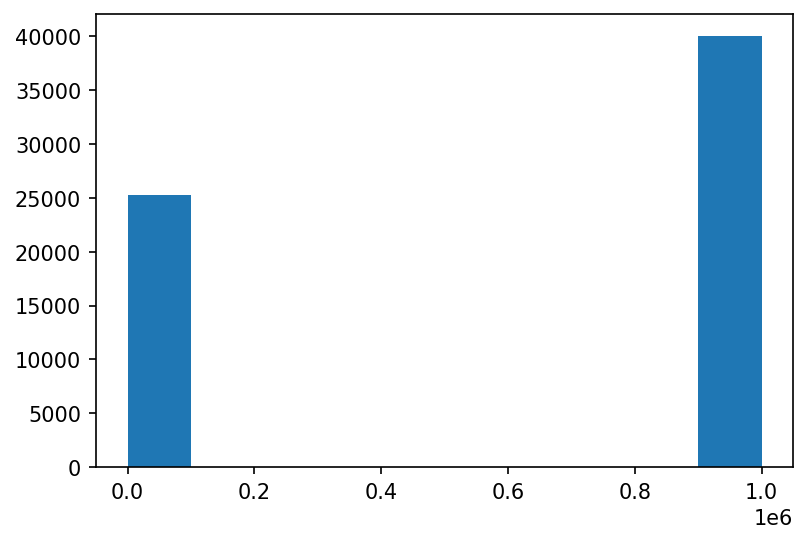

In [19]:
plt.figure(dpi = 150)
plt.hist(balrData['meas_EXTENDED_CLASS_SOF'])
plt.show()

In [22]:
len(np.where(balrData['meas_EXTENDED_CLASS_SOF'] < 1000)[0]) / len(balrData['meas_EXTENDED_CLASS_SOF'])

0.3869708933982187